# Exploration of the `Polynomial` class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from py_files.poly_dict import decompose_polynomial
from py_files.polynomial_class import Polynomial

----

## Addition, Subtraction and Multiplication

The `Polynomial` class used in conjunction with the `decompose_polynomial` module allow swift input and evaluation of polynomial expressions.
The function takes `str` input and can handle arbitrary spaces and exponents entered `**` or `^`

In [3]:
poly1 = decompose_polynomial("x**2  +5*x-3")
poly2 = decompose_polynomial("2*x^3+2*x^2- 3*x  -1")
poly3 = decompose_polynomial("7*x**8  + 3*x^5+   2*x^3+2*x-9")
poly4 = decompose_polynomial("5*x^6 -4*x^3+   x^2+5*x  -8")
poly5 = decompose_polynomial("7*x^9+3*x^4+2*x^2+x-2")

In [4]:
p1 = Polynomial(poly1)
p2 = Polynomial(poly2)
p3 = Polynomial(poly3)
p4 = Polynomial(poly4)
p5 = Polynomial(poly5)

Printing instances of the `Polynomial` class outputs terms `coefficient * x^power` to aid readability

In [5]:
print(f"p1: {p1}")
print(f"p2: {p2}")
print(f"p3: {p3}")
print(f"p4: {p4}")
print(f"p5: {p5}")

p1: x^2 + 5 * x - 3
p2: 2 * x^3 + 2 * x^2 - 3 * x - 1
p3: 7 * x^8 + 3 * x^5 + 2 * x^3 + 2 * x - 9
p4: 5 * x^6 - 4 * x^3 + x^2 + 5 * x - 8
p5: 7 * x^9 + 3 * x^4 + 2 * x^2 + x - 2


Testing the output of `+`, `-` and `*` by iterating through the declared instances

In [6]:
polynomials = [p2, p3, p4, p5]

for idx, polynomial in enumerate(polynomials, start=2):
    p_add = p1 + polynomial
    p_sub = p1 - polynomial
    p_mul = p1 * polynomial

    print(f"p1_add_p{idx}: {p_add}")
    print(f"p1_sub_p{idx}: {p_sub}")
    print(f"p1_mul_p{idx}: {p_mul}")
    print()

p1_add_p2: 2 * x^3 + 3 * x^2 + 2 * x - 4
p1_sub_p2: -2 * x^3 - x^2 + 8 * x - 2
p1_mul_p2: 2 * x^5 + 12 * x^4 + x^3 - 22 * x^2 + 4 * x + 3

p1_add_p3: 7 * x^8 + 3 * x^5 + 2 * x^3 + x^2 + 7 * x - 12
p1_sub_p3: -7 * x^8 - 3 * x^5 - 2 * x^3 + x^2 + 3 * x + 6
p1_mul_p3: 7 * x^10 + 35 * x^9 - 21 * x^8 + 3 * x^7 + 15 * x^6 - 7 * x^5 + 10 * x^4 - 4 * x^3 + x^2 - 51 * x + 27

p1_add_p4: 5 * x^6 - 4 * x^3 + 2 * x^2 + 10 * x - 11
p1_sub_p4: -5 * x^6 + 4 * x^3 + 5
p1_mul_p4: 5 * x^8 + 25 * x^7 - 15 * x^6 - 4 * x^5 - 19 * x^4 + 22 * x^3 + 14 * x^2 - 55 * x + 24

p1_add_p5: 7 * x^9 + 3 * x^4 + 3 * x^2 + 6 * x - 5
p1_sub_p5: -7 * x^9 - 3 * x^4 - x^2 + 4 * x - 1
p1_mul_p5: 7 * x^11 + 35 * x^10 - 21 * x^9 + 3 * x^6 + 15 * x^5 - 7 * x^4 + 11 * x^3 - 3 * x^2 - 13 * x + 6



Confirmed with Maxima CAS

<img src="images/maxima_oper.png"/>

----

## Quadratic

In [7]:
# the decompose_polynomial function creates a dictionary {exponents: coefficients}
p1.__repr__()

'Polynomial({2: 1, 1: 5, 0: -3})'

In [8]:
p1.__dict__

{'coeff': {2: 1, 1: 5, 0: -3}}

In [9]:
print(p1)

x^2 + 5 * x - 3


In [10]:
# calling to evaluate at x = 3
p1(3)

21

Plotting the quadratic expression

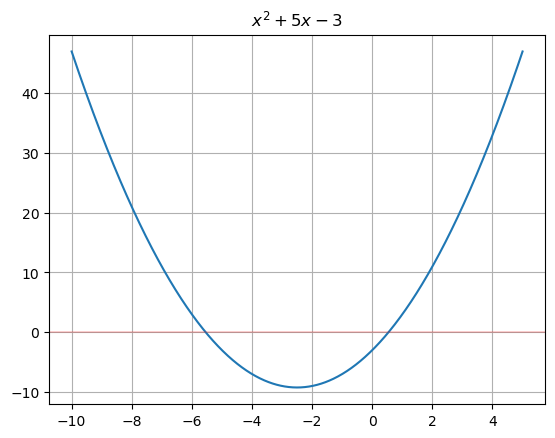

In [11]:
p1.plot(-10, 5)

The plot aids the initial guess `x0` in `newton`
`newton` returns tuple (`root`, `converged`, `iterations`)

In [12]:
p1.newton(0.5)

(0.5413812785388128, True, 1)

In [13]:
p1.newton(-5)

(-5.541381315636438, True, 2)

In [14]:
# More iterations to converge when further from root
p1.newton(-15)

(-5.541382028844698, True, 5)

Roots confirmed in Maxima CAS

<img src="images/maxima_quad.png"/>

#### Calculus

In [15]:
# Derivative

dp1dx = p1.derivative()
print(dp1dx)

2 * x + 5


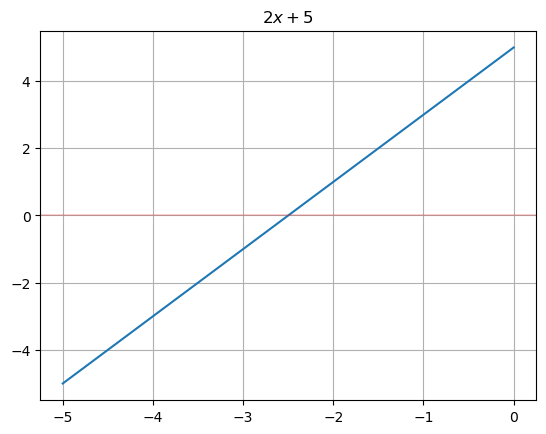

In [16]:
# we can also plot the derivative
dp1dx.plot(-5, 0)

In [ ]:
# Integral



----

## Cubic

In [17]:
p2.__repr__()

'Polynomial({3: 2, 2: 2, 1: -3, 0: -1})'

In [18]:
print(p2)

2 * x^3 + 2 * x^2 - 3 * x - 1


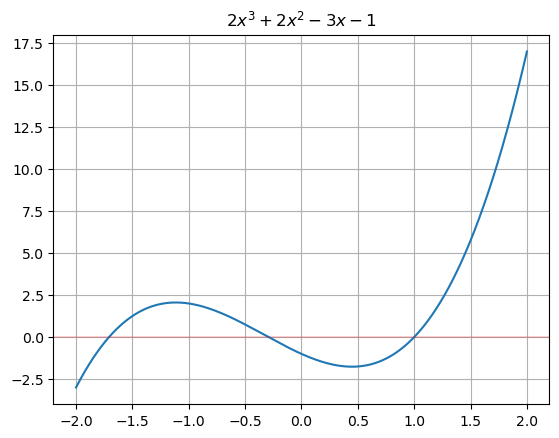

In [19]:
p2.plot(-2, 2)

The plot shows three roots $\in \mathbb{R}$

In [20]:
p2.newton(-1.5)

(-1.707131490726658, True, 3)

In [21]:
p2.newton(-0.5)

(-0.2928970470869912, True, 2)

In [22]:
p1.newton(1.0)

(0.5415282392026578, True, 2)

##### `newton` has failed to find $x=1$
This root probably requires the bisection method

<img src="images/maxima_cube.png"/>

----

### Calculus

In [23]:
# Derivative

dp2dx = p2.derivative()
print(dp2dx)

6 * x^2 + 4 * x - 3


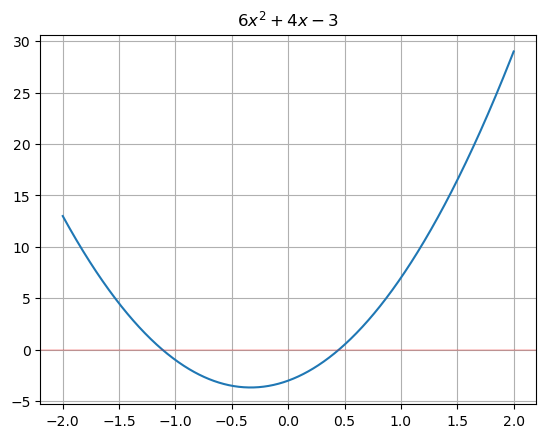

In [24]:
dp2dx.plot(-2, 2)

In [25]:
# Finding roots of quadratic function which will be the stationary points of f

root1 = dp2dx.newton(-1.0)
print(root1)

root2 = dp2dx.newton(0.5)
print(root2)

(-1.1151315789473684, True, 2)
(0.44840425531914896, True, 2)


We can implement the second derivative test by calling the first element of tuple `root_n` to the second derivative

- if $f''(x) < 0,$ then $f$ has a local minimum at $x$
- if $f''(x) > 0,$ then $f$ has a local maximum at $x$
- if $f''(x) = 0,$ then the test is inconclusive

In [26]:
# second derivative
d2dp2dx = dp2dx.derivative()
print(d2dp2dx)

12 * x + 4


In [27]:
sp1 = d2dp2dx(root1[0])
sp1

-9.381578947368421

In [28]:
sp2 = d2dp2dx(root2[0])
sp2

9.380851063829788

In [29]:
roots = [root1[0], root2[0]]
sp_s = [sp1, sp2]
for i, sp in enumerate(sp_s):
    if sp < 0:
        print(f"The stationary point {round(roots[i], 3)} is a local minimum")
    elif sp > 0:
        print(f"The stationary point {round(roots[i], 3)} is a local maximum")
    else:
        print("The second derivative test is inconclusive")

The stationary point -1.115 is a local minimum
The stationary point 0.448 is a local maximum


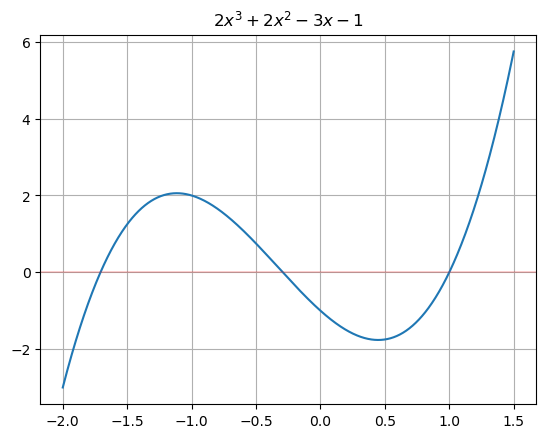

In [30]:
# As can be seen from the plot of f(x)
p2.plot(-2, 1.5)

----